In [1]:
pip install pandas

In [9]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load the Uber Fares dataset
df = pd.read_csv(r'C:\Users\user\Downloads\archive\uber.csv')

# Step 3: Display the first few rows
print(" First 5 rows of the dataset:")
print(df.head())

# Step 4: Display dataset structure and summary info
print("\n Dataset Info:")
print(df.info())


 First 5 rows of the dataset:
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('archive/uber.csv')

# 1. Structure and Dimensions
print(" Dataset Dimensions (rows, columns):")
print(df.shape)

print("\n Column Names:")
print(df.columns.tolist())

# 2. Data Types and Variable Descriptions
print("\n Data Types of Each Column:")
print(df.dtypes)

print("\n Basic Statistical Summary (Numerical Columns):")
print(df.describe())

# 3. Data Quality Assessment
print("\n Missing Values per Column:")
print(df.isnull().sum())

print("\n Total Duplicate Rows:")
print(df.duplicated().sum())


📊 Dataset Dimensions (rows, columns):
(200000, 9)

🧾 Column Names:
['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

ℹ️ Data Types of Each Column:
Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

📌 Basic Statistical Summary (Numerical Columns):
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065     

In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv('archive/uber.csv')

# Convert pickup_datetime to datetime if applicable
if 'pickup_datetime' in df.columns:
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# 1. Show missing values before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum())

# 2. Drop rows with any missing values
df_cleaned = df.dropna()

# 3. Show missing values after cleaning
print("\nMissing values after dropping rows with nulls:")
print(df_cleaned.isnull().sum())

# 4. Remove duplicate rows
duplicates = df_cleaned.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates}")
df_cleaned = df_cleaned.drop_duplicates()

# 5. Reset the index
df_cleaned.reset_index(drop=True, inplace=True)

# 6. Display cleaned dataset shape
print("\nCleaned dataset shape:", df_cleaned.shape)

# 7. Save cleaned dataset for Power BI
df_cleaned.to_csv('cleaned_uber.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_uber.csv'")


Missing values before cleaning:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Missing values after dropping rows with nulls:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Duplicate rows found: 0

Cleaned dataset shape: (199999, 9)

Cleaned dataset saved as 'cleaned_uber.csv'


In [22]:
import pandas as pd

# Assuming you've already cleaned your data as df_cleaned
# If not, reload the cleaned version from previous steps
# df_cleaned = pd.read_csv('archive/uber.csv')
# (Perform cleaning steps again if necessary)

# Export the cleaned DataFrame to CSV
df_cleaned.to_csv('cleaned_uber.csv', index=False)

print("Cleaned dataset successfully exported as 'cleaned_uber.csv'")


Cleaned dataset successfully exported as 'cleaned_uber.csv'


In [23]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('cleaned_uber.csv')

# 1. Descriptive statistics for numerical columns
print("Descriptive statistics:")
print(df.describe())

# 2. Mean, median, mode, std
print("\nMean values:")
print(df.mean(numeric_only=True))

print("\nMedian values:")
print(df.median(numeric_only=True))

print("\nMode values:")
print(df.mode(numeric_only=True).iloc[0])  # take the first mode row

print("\nStandard deviation:")
print(df.std(numeric_only=True))

# 3. Quartiles (Q1, Q2, Q3) and IQR
Q1 = df.quantile(0.25, numeric_only=True)
Q2 = df.quantile(0.50, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

print("\nQuartiles:")
print("Q1 (25%):\n", Q1)
print("Q2 (50% / Median):\n", Q2)
print("Q3 (75%):\n", Q3)
print("IQR (Q3 - Q1):\n", IQR)

# 4. Data range (max - min)
data_range = df.max(numeric_only=True) - df.min(numeric_only=True)
print("\nData Range:")
print(data_range)

# 5. Outlier detection using IQR method
print("\nOutlier Summary (using IQR):")
for col in df.select_dtypes(include='number').columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outlier(s)")


Descriptive statistics:
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  1.999990e+05  199999.000000     199999.000000    199999.000000   
mean   2.771248e+07      11.359892        -72.527631        39.935881   
std    1.601386e+07       9.901760         11.437815         7.720558   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382534e+07       6.000000        -73.992065        40.734796   
50%    2.774524e+07       8.500000        -73.981823        40.752592   
75%    4.155535e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    199999.000000  
mean          -72.525292         39.923890         1.684543  
std            13.117408          6.794829         1.385995  
min         -3356.666300       -881.985513         0.000000  
25%     

C:\Users\user\AppData\Local\Temp\ipykernel_1380\4020367159.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(uber['fare_amount'], shade=True, color='salmon')


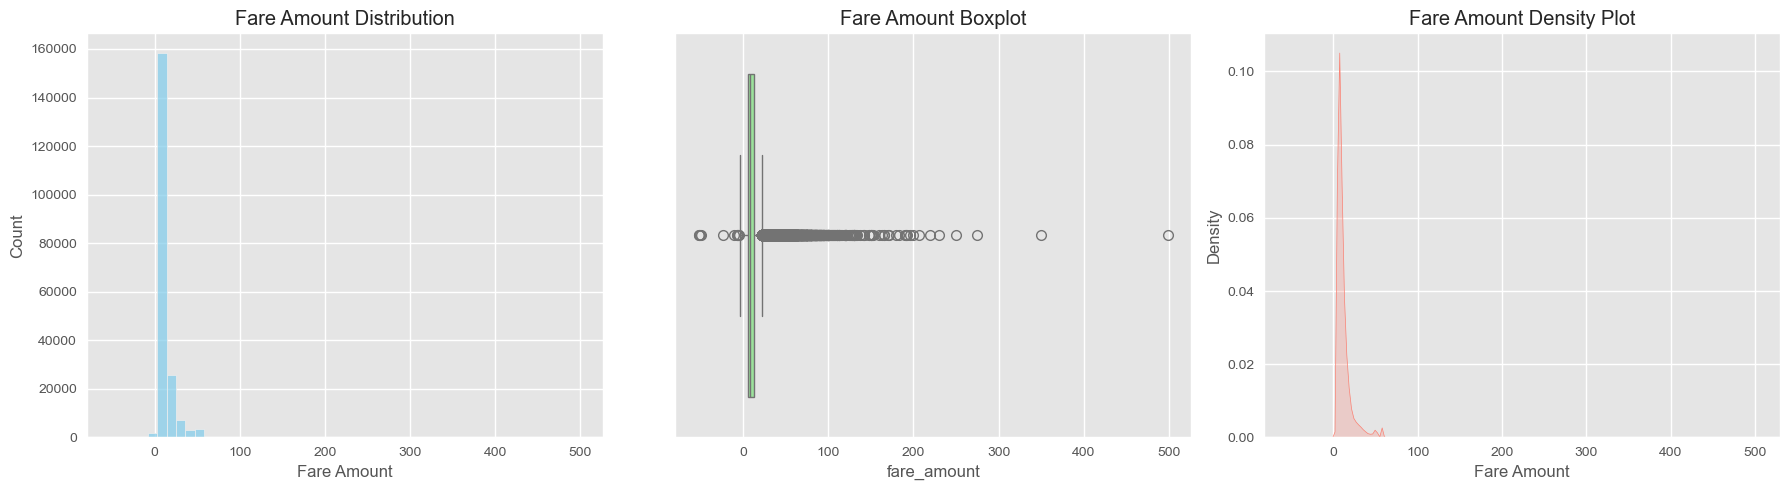

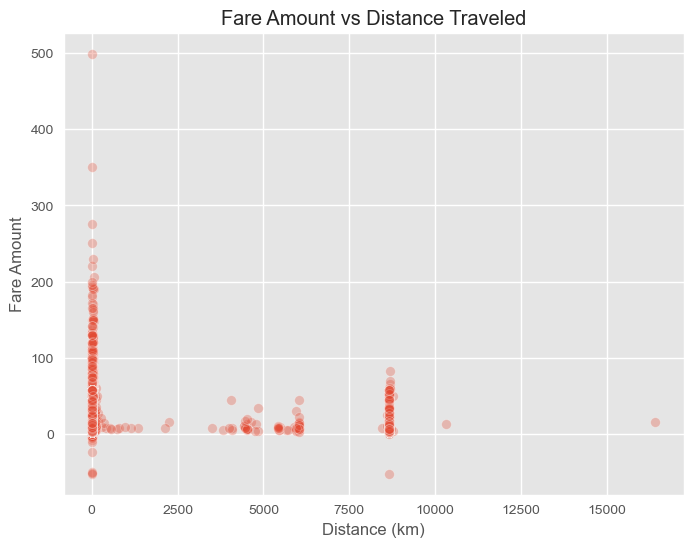

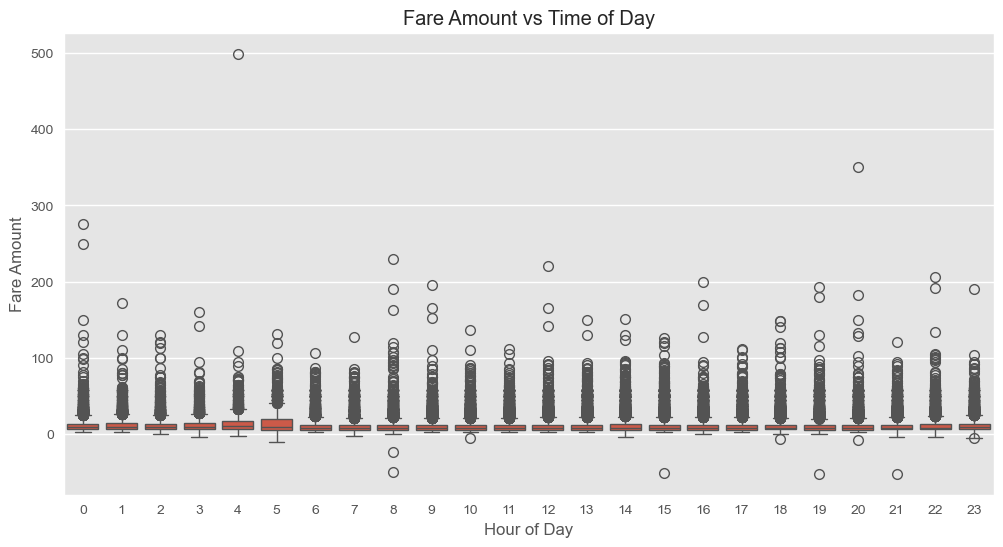

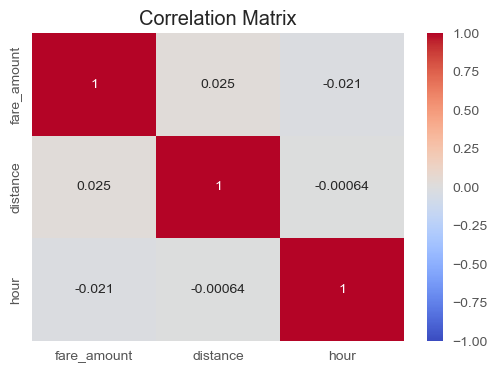

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
uber = pd.read_csv('archive/uber.csv')

# Clean column names from trailing/leading spaces
uber.columns = uber.columns.str.strip()

# Convert pickup_datetime to datetime and extract hour
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'], errors='coerce')
uber['hour'] = uber['pickup_datetime'].dt.hour

# Define haversine function to calculate distance between lat/lon pairs
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Earth radius in km
    return c * r

# Calculate distance if 'distance' column not present
if 'distance' not in uber.columns:
    required_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
    if all(col in uber.columns for col in required_cols):
        uber['distance'] = haversine(
            uber['pickup_latitude'],
            uber['pickup_longitude'],
            uber['dropoff_latitude'],
            uber['dropoff_longitude']
        )
    else:
        print("Warning: Distance cannot be calculated — missing latitude/longitude columns.")

# ---- b. Fare distribution visualizations ----
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(uber['fare_amount'], bins=50, kde=False, color='skyblue')
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(x=uber['fare_amount'], color='lightgreen')
plt.title('Fare Amount Boxplot')

plt.subplot(1, 3, 3)
sns.kdeplot(uber['fare_amount'], shade=True, color='salmon')
plt.title('Fare Amount Density Plot')
plt.xlabel('Fare Amount')

plt.tight_layout()
plt.show()

# ---- c. Relationships between variables ----

# 1. Fare vs Distance scatter plot (if distance column exists)
if 'distance' in uber.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='distance', y='fare_amount', data=uber, alpha=0.3)
    plt.title('Fare Amount vs Distance Traveled')
    plt.xlabel('Distance (km)')
    plt.ylabel('Fare Amount')
    plt.show()
else:
    print("Skipping Fare vs Distance plot - no distance data available.")

# 2. Fare vs Time of Day (hour)
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='fare_amount', data=uber)
plt.title('Fare Amount vs Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount')
plt.show()

# 3. Correlation matrix heatmap for key variables
cols_for_corr = ['fare_amount']
if 'distance' in uber.columns:
    cols_for_corr.append('distance')
if 'hour' in uber.columns:
    cols_for_corr.append('hour')

corr = uber[cols_for_corr].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [29]:
import pandas as pd

# Assuming you already loaded your dataset
uber = pd.read_csv('archive/uber.csv')

# Clean column names if needed
uber.columns = uber.columns.str.strip()

# Convert pickup_datetime to datetime format
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'], errors='coerce')

# Extract hour, day, month
uber['hour'] = uber['pickup_datetime'].dt.hour
uber['day'] = uber['pickup_datetime'].dt.day
uber['month'] = uber['pickup_datetime'].dt.month

# Extract day of week (Monday=0, Sunday=6)
uber['day_of_week'] = uber['pickup_datetime'].dt.dayofweek

# Define peak hours (e.g., 7-10 AM and 4-7 PM)
def peak_offpeak(hour):
    if (7 <= hour <= 10) or (16 <= hour <= 19):
        return 'peak'
    else:
        return 'off-peak'

uber['peak_offpeak'] = uber['hour'].apply(peak_offpeak)

# Check the new features
print(uber[['pickup_datetime', 'hour', 'day', 'month', 'day_of_week', 'peak_offpeak']].head())


            pickup_datetime  hour  day  month  day_of_week peak_offpeak
0 2015-05-07 19:52:06+00:00    19    7      5            3         peak
1 2009-07-17 20:04:56+00:00    20   17      7            4     off-peak
2 2009-08-24 21:45:00+00:00    21   24      8            0     off-peak
3 2009-06-26 08:22:21+00:00     8   26      6            4         peak
4 2014-08-28 17:47:00+00:00    17   28      8            3         peak


In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming uber dataframe already has 'day_of_week' and 'peak_offpeak' features

# 1. Check data types to identify categorical variables
print("Data types:\n", uber.dtypes)

# Let's assume 'day_of_week' is numeric but categorical (0=Mon,...6=Sun)
# 'peak_offpeak' is text categorical

# 2. Label encode 'peak_offpeak'
le = LabelEncoder()
uber['peak_offpeak_encoded'] = le.fit_transform(uber['peak_offpeak'])

print("Categories for 'peak_offpeak':", le.classes_)

# 3. One-hot encode 'day_of_week' if you want separate columns for each day
day_of_week_dummies = pd.get_dummies(uber['day_of_week'], prefix='day')

# Append these dummy columns to the dataframe
uber = pd.concat([uber, day_of_week_dummies], axis=1)

# Check new columns
print(uber.head())


Data types:
 Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
hour                               int32
day                                int32
month                              int32
day_of_week                        int32
peak_offpeak                      object
dtype: object
Categories for 'peak_offpeak': ['off-peak' 'peak']
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.00000018

In [31]:
# Save the enhanced dataset to CSV (without the DataFrame index)
uber.to_csv('archive/uber_enhanced.csv', index=False)

print("Enhanced dataset saved as 'archive/uber_enhanced.csv'")


Enhanced dataset saved as 'archive/uber_enhanced.csv'
